<a href="https://colab.research.google.com/github/GOKU-GO/gopal/blob/main/unZaimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 6.5MB 7.9MB/s 
     |████████████████████████████████| 15.3MB 229kB/s 


In [3]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


In [4]:
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
datae = pd.read_csv('/content/drive/MyDrive/datasets/listings.csv')
datae.head()

In [7]:
listings_details = pd.read_csv("/content/drive/MyDrive/datasets/listingsfull.csv", index_col= "id", low_memory=False)

In [12]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]
listings = pd.merge(datae, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10272 entries, 0 to 10271
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [ ]:
lats2018 = datae['latitude'].tolist()
lons2018 = datae['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[30.26715, -97.74306], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

Text(0.5, 1.0, 'Average daily price for a 2-persons accommodation')

Text(0.5, 0, 'Average daily price (Euro)')

Text(0, 0.5, '')

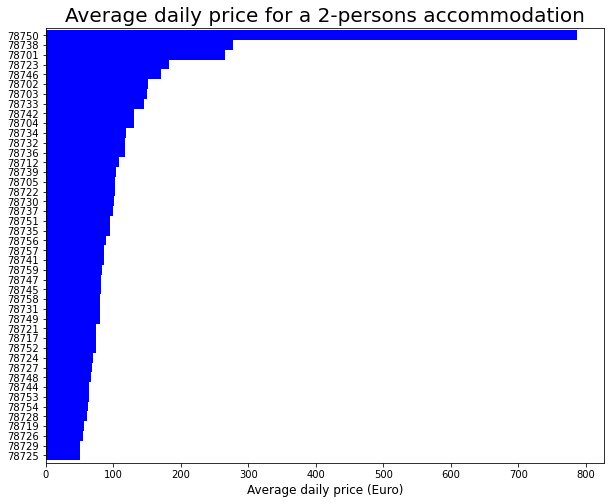

In [26]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [50]:
aust = gpd.read_file("/content/drive/MyDrive/neighbourhoods.geojson")
feq = pd.DataFrame(feq)
feq = feq.transpose()
feq
#feq = feq.reshape(1,44*1)
#print(newarr)
# pd.concat(
#     objs,
#     axis=0,
#     join="outer",
#     ignore_index=False,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,
# )

aust = pd.merge( aust, feq, left_on='neighbourhood', how='left')
aust.rename(columns={'price': 'average_price'}, inplace=True)
aust.average_price = aust.average_price.round(decimals=0)

map_dict = aust.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[30.26715, -97.74306], zoom_start=11)
folium.GeoJson(data=aust,
               name='Austin',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
                style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

,price
neighbourhood,
78725,50.210526
78729,50.571429
78726,54.500000
78719,56.500000
78728,61.333333
78754,62.275000
78753,64.478261
78744,64.513158
78748,67.393939


TypeError: ignored

In [53]:
aust

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


In [55]:
feq

,price
neighbourhood,
78725,50.210526
78729,50.571429
78726,54.500000
78719,56.500000
78728,61.333333
78754,62.275000
78753,64.478261
78744,64.513158
78748,67.393939
